In [2]:
!pip install geneticalgorithm

     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     -------------------------- ----------- 30.7/44.3 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 44.3/44.3 kB 436.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15108 sha256=bda7d7582ba67aee452d54ad3998d267ea62c3e64a825fc72f1a806c83c12d46
  Stored in directory: c:\users\thienng23\appdata\local\pip\cache\wheels\07\e6\86\f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


 The best solution found:                                                                           
 [21.96997903  0.12422379]

 Objective function:
 -0.9649122807017544


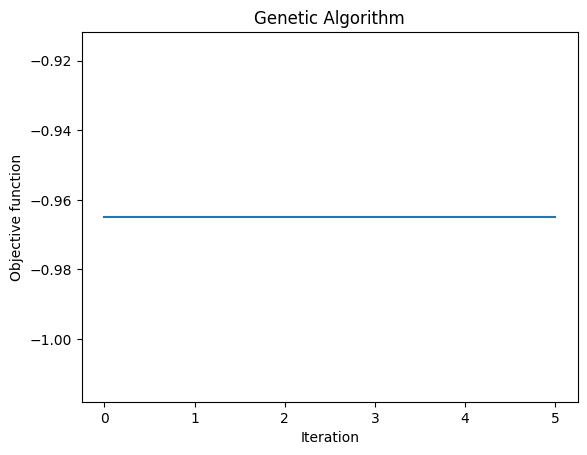

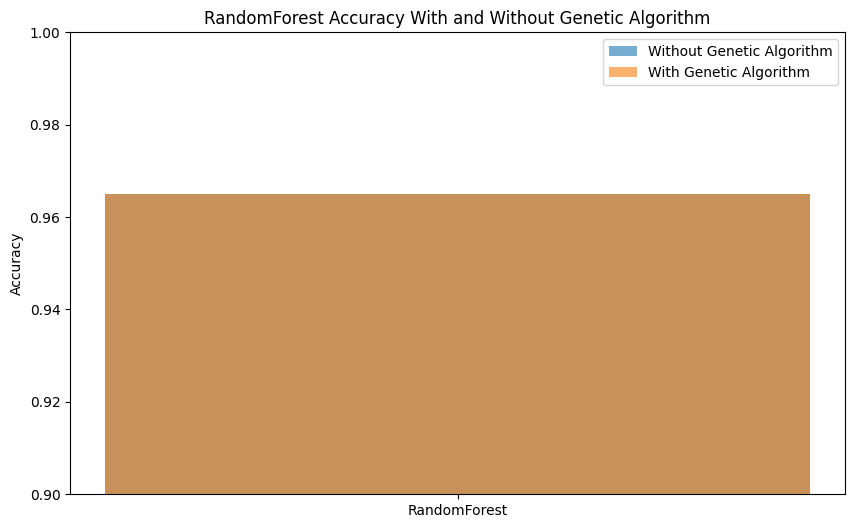

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from geneticalgorithm import geneticalgorithm as ga

# Load dataset
data_bc = load_breast_cancer()
X = data_bc.data
y = data_bc.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest without genetic algorithm
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_no_ga = accuracy_score(y_test, y_pred)

# Define the genetic algorithm function
def fitness_function(params):
    n_estimators = int(params[0])
    max_features = params[1]
    rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# Define the genetic algorithm model
varbound = np.array([[10, 200], [0.1, 1.0]])
algorithm_param = {'max_num_iteration': 5, 'population_size': 80, 'mutation_probability': 0.2, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type':'uniform', 'max_iteration_without_improv': None}

model = ga(function=fitness_function, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Extract the best parameters
best_params = model.output_dict['variable']
n_estimators_best = int(best_params[0])
max_features_best = best_params[1]

# Train RandomForest with genetic algorithm
rf_ga = RandomForestClassifier(n_estimators=n_estimators_best, max_features=max_features_best, random_state=42)
rf_ga.fit(X_train, y_train)
y_pred_ga = rf_ga.predict(X_test)
accuracy_ga = accuracy_score(y_test, y_pred_ga)

# Plotting
classifiers = ['RandomForest']
accuracies_no_ga = [accuracy_no_ga]
accuracies_ga = [accuracy_ga]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies_no_ga, label='Without Genetic Algorithm', alpha=0.6)
plt.bar(classifiers, accuracies_ga, label='With Genetic Algorithm', alpha=0.6)
plt.ylabel('Accuracy')
plt.title('RandomForest Accuracy With and Without Genetic Algorithm')
plt.legend()
plt.ylim(0.9, 1.0)
plt.show()
